In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import seaborn as sns
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

## Read in data

In [3]:
# Create a list with all the strings identifying your members
# use a combination of range and zfill to get the leading zeros.
member_list = [str(x).zfill(2) for x in range(1,81)]

In [4]:
# load pr data
member_ds_p = {}
for i in member_list:
    path = f'/g/data/ua8/C20C/v3/member_monthly/PRATE/*/*_mem0{i}.nc'
    member_ds_p[i] = xr.open_mfdataset(path)
    member_ds_p[i] = member_ds_p[i].chunk(chunks={'time':-1})

In [5]:
# concatenate the data into an xarray with the new member dimension
ds_prate = xr.concat(member_ds_p.values(), dim='member')
ds_prate.coords['member'] = member_list

In [6]:
ds_prate

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 256, lon: 512, member: 80, time: 1992)
Coordinates:
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat        (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * time       (time) datetime64[ns] 1850-01-16T10:30:00 ... 2015-12-16T10:30:00
  * member     (member) <U2 '01' '02' '03' '04' '05' ... '77' '78' '79' '80'
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (member, time, bnds) datetime64[ns] dask.array<chunksize=(1, 1992, 2), meta=np.ndarray>
    PRATE      (member, time, lat, lon) float32 dask.array<chunksize=(1, 1992, 256, 512), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Sun Dec 23 05:57:59 2018: cdo -v -f nc4 -r -monavg PRATE....
    institution:    NOAA ESRL Physical Sciences Division & CU/CIRES \n
    Conventions:    CF-1.6
    platform:       Model
    citation:       <http://onlinelibrary.wiley.com/doi/10.1002/qj.776/abstra...
    experiment:     451 = SODAsi.3 pentad 8 member SSTs climatologically adju...
    observations:   International Surface Pressure Databank version 4.7
    frequency:      mon
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...
    comments:       Data is from \n NOAA-CIRES-DOE 20th Century Reanalysis ve...
    main_citation:  <https://doi.org/10.1002/qj.3598>.\n Slivinski et al. 201...
    home_page:      <https://go.usa.gov/XTd>

In [7]:
# load temp data
member_ds_t = {}
for i in member_list:
    path = f'/g/data/ua8/C20C/v3/member_monthly/TMPS/*/*_mem0{i}.nc'
    member_ds_t[i] = xr.open_mfdataset(path)
    member_ds_t[i] = member_ds_t[i].chunk(chunks={'time':-1})

In [8]:
# concatenate the data into an xarray with the new member dimension
ds_tmps = xr.concat(member_ds_t.values(), dim='member')
ds_tmps.coords['member'] = member_list

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large

In [9]:
# combine precipitation and temperature into one dataset
reanal = xr.Dataset({'tmp': ds_tmps.TMP, 'pr': ds_prate.PRATE})
# change the pr units
reanal['pr'] = reanal.pr*86400
reanal

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


,Array,Chunk
Bytes,333.88 GB,4.17 GB
Shape,"(80, 1992, 512, 1023)","(1, 1992, 512, 1023)"
Count,40836 Tasks,80 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,667.75 GB,8.35 GB
Shape,"(80, 1992, 512, 1023)","(1, 1992, 512, 1023)"
Count,40886 Tasks,80 Chunks
Type,float64,numpy.ndarray


## Area weighting and land frac

In [10]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/ua8/C20C/v3/land.nc')
landmask = landfrac_ds.mean(dim='time')

In [11]:
# area weighting 
reanal_w = reanal*np.cos(reanal.lat*(np.pi/180))

## Group the data by month

In [12]:
# group the data by month (take the monthly mean)
reanal_mon = reanal_w.resample(time='M').mean(dim='time')

## Select our eruption dates

In [13]:
# eruption date
e_date = pd.to_datetime(['1883-08','1902-10', '1963-03', '1982-04', '1991-06'])

# save arrays of times relative to each eruption
e_pre5yrs = e_date - 60 * pd.offsets.MonthBegin()
e_pre3mon = e_date - 3 * pd.offsets.MonthBegin()
e_post5yrs = e_date + 61 * pd.offsets.MonthBegin()

In [14]:
# eruption names
volcanoes = ['Krakatoa', 'Santa Maria','Agung','El Chichon', 'Pinatubo']

In [15]:
# select out the 10 year time frame around each eruption (5yrs before and after)
Krakatoa = reanal_mon.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
SantaMaria = reanal_mon.sel(time = slice(e_pre5yrs[1], e_post5yrs[1]))
Agung = reanal_mon.sel(time = slice(e_pre5yrs[2], e_post5yrs[2]))
ElChicon = reanal_mon.sel(time = slice(e_pre5yrs[3], e_post5yrs[3]))
Pinatubo = reanal_mon.sel(time = slice(e_pre5yrs[4], e_post5yrs[4]))

## Anomalies

In [16]:
# use functions to calculate the monthly anomalies for the globe
K_mon_anom_Glob = func.monthly_anomaly(Krakatoa, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_Glob = func.monthly_anomaly(SantaMaria, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_Glob = func.monthly_anomaly(Agung, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_Glob = func.monthly_anomaly(ElChicon, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_Glob = func.monthly_anomaly(Pinatubo, e_pre5yrs[4], e_pre3mon[4])

In [17]:
# store all eruptions in one array
composite_mon_Glob = funcM.reset_time(K_mon_anom_Glob, S_mon_anom_Glob, A_mon_anom_Glob, E_mon_anom_Glob, P_mon_anom_Glob, volcanoes)

In [18]:
# select out each region
composite_mon_SH = composite_mon_Glob.sel(lat=slice(-90,0))
composite_mon_Aus = composite_mon_Glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.land==1, drop=True)
composite_mon_EA = composite_mon_Glob.sel(lat=slice(-50,-10), lon=slice(140,155)).where(landmask.land==1, drop=True)

## Multi-model mean and percentiles

In [19]:
# calculate the monthly model mean for monthly anomalies
composite_mmm_Glob = composite_mon_Glob.mean(dim='member').mean(dim=('lat','lon'))
composite_mmm_SH = composite_mon_SH.mean(dim='member').mean(dim=('lat','lon'))
composite_mmm_Aus = composite_mon_Aus.mean(dim='member').mean(dim=('lat','lon'))
composite_mmm_EA = composite_mon_EA.mean(dim='member').mean(dim=('lat','lon'))

In [20]:
# calcuate the lat lon mean (llm) to use for calculating percentiles
composite_llm_Glob = composite_mon_Glob.mean(dim=('lat','lon'))
composite_llm_SH = composite_mon_SH.mean(dim=('lat','lon'))
composite_llm_Aus = composite_mon_Aus.mean(dim=('lat','lon'))
composite_llm_EA = composite_mon_EA.mean(dim=('lat','lon'))

In [21]:
# calculate percentile
# 10th percentile
p10_Glob = composite_llm_Glob.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])
p10_SH = composite_llm_SH.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])
p10_Aus = composite_llm_Aus.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])
p10_EA = composite_llm_EA.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])

# 90th percentile
p90_Glob = composite_llm_Glob.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])
p90_SH = composite_llm_SH.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])
p90_Aus = composite_llm_Aus.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])
p90_EA = composite_llm_EA.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])

In [22]:
# take the composite over all volcanoes
V_composite_mmm_Glob = composite_mmm_Glob.mean(dim='volcano')
V_composite_mmm_SH = composite_mmm_SH.mean(dim='volcano')
V_composite_mmm_Aus = composite_mmm_Aus.mean(dim='volcano')
V_composite_mmm_EA = composite_mmm_EA.mean(dim='volcano')

In [23]:
composite_llm_Glob

,Array,Chunk
Bytes,387.20 kB,8 B
Shape,"(5, 121, 80)","(1, 1, 1)"
Count,1372917 Tasks,48400 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,387.20 kB,8 B
Shape,"(5, 121, 80)","(1, 1, 1)"
Count,1372967 Tasks,48400 Chunks
Type,float64,numpy.ndarray


# Minimum values

In [23]:
# calculate the minimum value of the mmm for each spatial region
composite_min_mmm_Glob = V_composite_mmm_Glob.min()
composite_min_mmm_SH = V_composite_mmm_SH.min()
composite_min_mmm_Aus = V_composite_mmm_Aus.min()
composite_min_mmm_EA = V_composite_mmm_EA.min()

In [24]:
# print minimum values for composite as calculated above
print('Minimum value of composite temperature signal on each spatial scale is:\n Global:', 
      composite_min_mmm_Glob.tmp.values.round(decimals=2), '\n SH:', 
      composite_min_mmm_SH.tmp.values.round(decimals=2), '\n Aus:', 
      composite_min_mmm_Aus.tmp.values.round(decimals=2), '\n EA:', 
      composite_min_mmm_EA.tmp.values.round(decimals=2))
print('Minimum value of composite precipitation signal on each spatial scale is:\n Global:', 
      composite_min_mmm_Glob.pr.values.round(decimals=2), '\n SH:', 
      composite_min_mmm_SH.pr.values.round(decimals=2), '\n Aus:', 
      composite_min_mmm_Aus.pr.values.round(decimals=2), '\n EA:', 
      composite_min_mmm_EA.pr.values.round(decimals=2))

KeyboardInterrupt: 

In [ ]:
# calculate the minimum value for Krakatoa in each spatial region
K_min_mmm_Glob = composite_mmm_Glob.sel(volcano='Krakatau').min()
K_min_mmm_SH = composite_mmm_SH.sel(volcano='Krakatau').min()
K_min_mmm_Aus = composite_mmm_Aus.sel(volcano='Krakatau').min()
K_min_mmm_EA = composite_mmm_EA.sel(volcano='Krakatau').min()

In [ ]:
# print minimum values for Krakatoa as calculated above
print('Minimum value of composite temperature signal on each spatial scale is:\n Global:', 
      K_min_mmm_Glob.tmp.values.round(decimals=2), '\n SH:', K_min_mmm_SH.tmp.values.round(decimals=2), 
      '\n Aus:', K_min_mmm_Aus.tmp.values.round(decimals=2), '\n EA:', K_min_mmm_EA.tmp.values.round(decimals=2))
print('Minimum value of composite precipitation signal on each spatial scale is:\n Global:', 
      K_min_mmm_Glob.pr.values.round(decimals=2), '\n SH:', K_min_mmm_SH.pr.values.round(decimals=2), '\n Aus:', 
      K_min_mmm_Aus.pr.values.round(decimals=2), '\n EA:', K_min_mmm_EA.pr.values.round(decimals=2))

## Figures

In [25]:
blues = sns.color_palette("Blues_r")
greens = sns.color_palette("Greens_r")
reds = sns.color_palette("Reds_r")

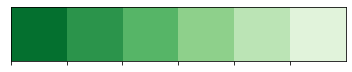

In [26]:
sns.palplot(sns.color_palette("Greens_r"))

In [27]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [ ]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.tmp, V_composite_mmm_Glob.tmp, p10_Glob.tmp, p90_Glob.tmp, reds, ax = axes[0,0])
# fplot.SEA_plots(composite_mmm_SH.tmp, V_composite_mmm_SH.tmp, p10_SH.tmp, p90_SH.tmp, reds, ax = axes[0,1])
# fplot.SEA_plots(composite_mmm_Aus.tmp, V_composite_mmm_Aus.tmp, p10_Aus.tmp, p90_Aus.tas, reds, ax = axes[1,0])
# fplot.SEA_plots(composite_mmm_EA.tmp, V_composite_mmm_EA.tmp, p10_EA.tmp, p90_EA.tmp, reds, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('R_SEA_mon_tmp.png', dpi=300, bbox_inches='tight')

In [ ]:
# plot monthly anomalies of precipitation as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, greens, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH.pr, V_composite_mmm_SH.pr, p10_SH.pr, p90_SH.pr, greens, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, greens, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA.pr, V_composite_mmm_EA.pr, p10_EA.pr, p90_EA.pr, greens, ax = axes[1,1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0,0].set(ylabel = 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel = 'Precipitation anomaly [mm/day]', xlabel = 'Month relative to eruption', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

#fig.suptitle('Superposed epoch analysis of precipitation anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('R_SEA_mon_pr.png', dpi=300, bbox_inches='tight')